<a href="https://colab.research.google.com/github/s4ki3f/yolov5/blob/master/classify/tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/classify/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>See <a href="https://github.com/ultralytics/yolov5/issues/new/choose">GitHub</a> for community support or <a href="https://ultralytics.com/contact">contact us</a> for professional support.

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-3-g61ebf5e Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.6/78.2 GB disk)


# 1. Predict

`classify/predict.py` runs YOLOv5 Classifcation inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/predict-cls`. Example inference sources are:

```shell
python classify/predict.py --source 0  # webcam
                              img.jpg  # image 
                              vid.mp4  # video
                              screen  # screenshot
                              path/  # directory
                              'path/*.jpg'  # glob
                              'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                              'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [2]:
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="deO5u1tP8oXg2HyoSRT4")
project = rf.workspace("tdc").project("cow-identification")
dataset = project.version(1).download("folder")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=df760f286f7a6c17035f2f6cf8dcf78696ffb16d064d6a8cb7fc53b4d2bdc082
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Cow-Identification-1 in folder:: 100%|██████████| 6693/6693 [00:03<00:00, 1712.65it/s]


In [4]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = dataset_name

In [5]:
%cd /content/yolov5

/content/yolov5


In [6]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

  0%|          | 0.00/4.87M [00:00<?, ?B/s]

  0%|          | 0.00/10.5M [00:00<?, ?B/s]

  0%|          | 0.00/24.9M [00:00<?, ?B/s]

  0%|          | 0.00/50.9M [00:00<?, ?B/s]

  0%|          | 0.00/92.0M [00:00<?, ?B/s]

In [24]:
!python classify/train.py --model /content/yolov5/runs/train-cls/exp2/weights/last.pt --data $DATASET_NAME  --epochs 100 --batch 64 --img 128 --pretrained /content/yolov5/runs/train-cls/exp2/weights/last.pt

classify/train: model=/content/yolov5/runs/train-cls/exp2/weights/last.pt, data=Cow-Identification-1, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=/content/yolov5/runs/train-cls/exp2/weights/last.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), 

In [25]:
!python classify/predict.py --weights /content/yolov5/runs/train-cls/exp4/weights/best.pt --img 224 --source /content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg


classify/predict: weights=['/content/yolov5/runs/train-cls/exp4/weights/best.pt'], source=/content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 264 layers, 47132346 parameters, 0 gradients, 129.2 GFLOPs
image 1/1 /content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg: 224x224 cattle_6278 0.35, cattle_3400 0.15, cattle_4985 0.04, cattle_5695 0.03, cattle_5836 0.02, 15.7ms
Speed: 0.3ms pre-process, 15.7ms inference, 0.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp6


In [21]:
!python classify/train.py --model yolov5x-cls.pt --data $DATASET_NAME  --epochs 100 --batch 64 --img 128 --pretrained /content/yolov5/runs/train-cls/exp2/weights/last.pt

classify/train: model=yolov5x-cls.pt, data=Cow-Identification-1, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=/content/yolov5/runs/train-cls/exp2/weights/last.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(al

In [10]:
!python classify/val.py --weights runs/train-cls/exp2/weights/best.pt --data ../datasets/$DATASET_NAME

classify/val: data=../datasets/Cow-Identification-1, weights=['runs/train-cls/exp2/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 264 layers, 47132346 parameters, 0 gradients, 129.2 GFLOPs
testing: 100% 2/2 [00:01<00:00,  1.04it/s]
                   Class      Images    top1_acc    top5_acc
                     all         251     0.00797       0.012
             cattle_0100           1           0           0
             cattle_0200           1           0           0
             cattle_0300           1           0           0
             cattle_0400           2           0           0
             cattle_0500           1           0           0
             cattle_0600           2           0           0
             cattle_0700           1           0        

In [22]:
!python classify/val.py --weights runs/train-cls/exp3/weights/best.pt --data ../datasets/$DATASET_NAME

classify/val: data=../datasets/Cow-Identification-1, weights=['runs/train-cls/exp3/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 264 layers, 47132346 parameters, 0 gradients, 129.2 GFLOPs
testing: 100% 2/2 [00:01<00:00,  1.04it/s]
                   Class      Images    top1_acc    top5_acc
                     all         251     0.00398      0.0279
             cattle_0100           1           0           0
             cattle_0200           1           0           0
             cattle_0300           1           0           0
             cattle_0400           2           0           0
             cattle_0500           1           0           0
             cattle_0600           2           0           0
             cattle_0700           1           0        

In [23]:
!python classify/predict.py --weights /content/yolov5/runs/train-cls/exp3/weights/best.pt --img 224 --source /content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg


classify/predict: weights=['/content/yolov5/runs/train-cls/exp3/weights/best.pt'], source=/content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 264 layers, 47132346 parameters, 0 gradients, 129.2 GFLOPs
image 1/1 /content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg: 224x224 cattle_5404 0.06, cattle_3400 0.05, cattle_4649 0.04, cattle_6278 0.03, cattle_5477 0.03, 15.0ms
Speed: 0.3ms pre-process, 15.0ms inference, 0.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp5


In [19]:
!python classify/predict.py --weights /content/yolov5/runs/train-cls/exp2/weights/best.pt --img 224 --source /content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg
# display.Image(filename='runs/predict-cls/exp/zidane.jpg', width=600)

classify/predict: weights=['/content/yolov5/runs/train-cls/exp2/weights/best.pt'], source=/content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 264 layers, 47132346 parameters, 0 gradients, 129.2 GFLOPs
image 1/1 /content/datasets/Cow-Identification-1/valid/cattle_6278/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg: 224x224 cattle_6278 0.22, cattle_3400 0.04, cattle_4985 0.02, cattle_6313 0.02, cattle_0900 0.01, 15.0ms
Speed: 0.3ms pre-process, 15.0ms inference, 0.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp4


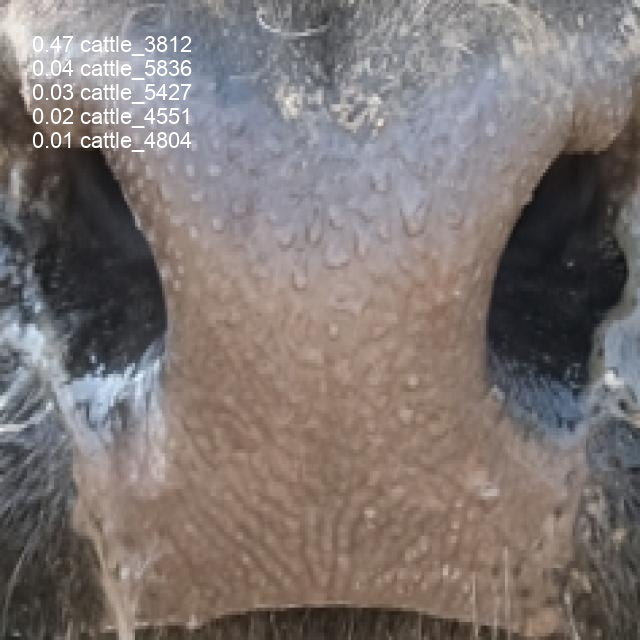

In [15]:
from IPython.display import Image
Image('/content/yolov5/runs/predict-cls/exp2/cattle_3812_DSCF1567_jpg.rf.10f7ce4a86622259efb3cfb21ab68e68.jpg')

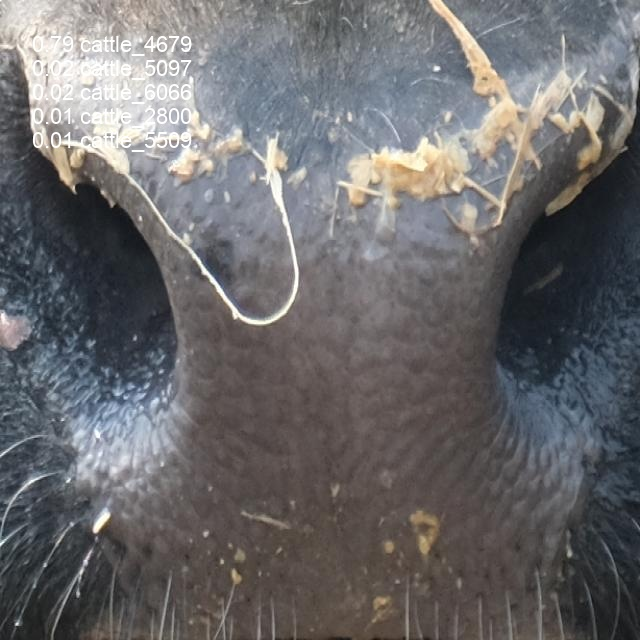

In [18]:
Image('/content/yolov5/runs/predict-cls/exp3/cattle_4679_DSCF0917_jpg.rf.90dbd52a1c682af9a6e9ec639a18285b.jpg')

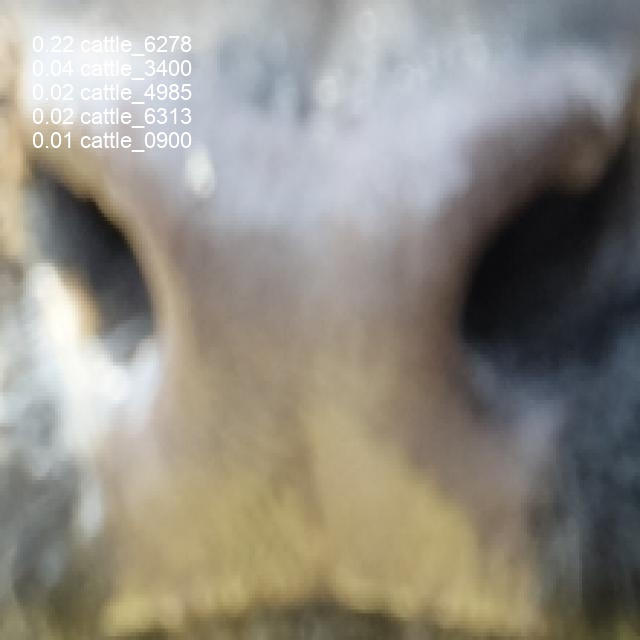

In [20]:
Image('/content/yolov5/runs/predict-cls/exp4/cattle_6278_DSCF7945_jpg.rf.043afad14d46be4d48cba0e1569d8a2a.jpg')

# 2. Validate
Validate a model's accuracy on the [Imagenet](https://image-net.org/) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [13]:
# Download Imagenet val (6.3G, 50000 images)
!bash data/scripts/get_imagenet.sh --val

--2023-01-10 02:04:31--  https://image-net.org/data/ILSVRC/2012/ILSVRC2012_img_val.tar
Resolving image-net.org (image-net.org)... 171.64.68.16
Connecting to image-net.org (image-net.org)|171.64.68.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6744924160 (6.3G) [application/x-tar]
Saving to: ‘ILSVRC2012_img_val.tar’

ILSVRC2012_img_val.  13%[=>                  ] 854.95M  16.8MB/s    eta 5m 46s ^C


In [14]:
# Validate YOLOv5s on Imagenet val
!python classify/val.py --weights yolov5s-cls.pt --data ../datasets/imagenet --img 224 --half


classify/val: data=../datasets/Cow-Identification-1/, weights=['yolov5s-cls.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 117 layers, 5447688 parameters, 0 gradients, 11.4 GFLOPs
testing: 100% 2/2 [00:01<00:00,  1.20it/s]
                   Class      Images    top1_acc    top5_acc
                     all         251           0     0.00797
                   tench           1           0           0
                goldfish           1           0           0
       great white shark           1           0           0
             tiger shark           2           0           0
        hammerhead shark           1           0           0
            electric ray           2           0           0
                stingray           1           0           0
                  

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s Classification model on the [Imagenette](https://image-net.org/) dataset with `--data imagenet`, starting from pretrained `--pretrained yolov5s-cls.pt`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **Training Results** are saved to `runs/train-cls/` with incrementing run directories, i.e. `runs/train-cls/exp2`, `runs/train-cls/exp3` etc.
<br><br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/train-yolov5-classification-custom-data/](https://blog.roboflow.com/train-yolov5-classification-custom-data/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KZiKUAjtARHAfZCXbJRv14-pOnIsBLPV?usp=sharing)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://user-images.githubusercontent.com/26833433/202802162-92e60571-ab58-4409-948d-b31fddcd3c6f.png"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'TensorBoard' #@param ['TensorBoard', 'Comet', 'ClearML']

if logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  import clearml; clearml.browser_login()

In [ ]:
# Train YOLOv5s Classification on Imagenette160 for 3 epochs
!python classify/train.py --model yolov5s-cls.pt --data imagenette160 --epochs 5 --img 224 --cache

classify/train: model=yolov5s-cls.pt, data=imagenette160, epochs=5, batch_size=64, imgsz=224, nosave=False, cache=ram, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=True, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-3-g61ebf5e Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/

Dataset not found ⚠️, missing path /content/datasets/imagenette160, attempting download...
100% 103M/103M [00:00<00:00, 347MB/s] 
Unzipping /content/datasets/imagenette160.zip...
Dataset download success ✅ (3.3s), saved to /content/datasets/imagenette160

albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitt

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/comet). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/clearml) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices. 

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.